In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Time_series_analysis_and_forecast_DATASET.csv',parse_dates=["FullDate"],index_col="FullDate")

In [3]:
df.head

<bound method NDFrame.head of                      Tmax     SysLoad  GasPrice  ElecPrice
FullDate                                                  
2010-09-01 00:00:00  15.8  1688.21500    3.6900     23.710
2010-09-01 01:00:00  15.8  1669.19500    3.6900     22.635
2010-09-01 02:00:00  15.8  1491.98000    3.6900     22.565
2010-09-01 03:00:00  15.8  1330.76000    3.6900     18.910
2010-09-01 04:00:00  15.8  1247.94000    3.6900     18.030
...                   ...         ...       ...        ...
2021-02-28 19:00:00  24.3   449.63625    5.4848    117.925
2021-02-28 20:00:00  24.3   815.59975    5.4848     87.880
2021-02-28 21:00:00  24.3   745.12325    5.4848     62.060
2021-02-28 22:00:00  24.3   694.95150    5.4848     62.000
2021-02-28 23:00:00  24.3   714.69630    5.4848     62.955

[92016 rows x 4 columns]>

In [4]:
df2=df.resample('D').sum()

In [5]:
df2.tail(6)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2021-02-23,549.6,-1699.79570,131.8944,211.985
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495
2021-02-27,564.0,4932.88015,130.0800,488.980
2021-02-28,583.2,6675.05485,131.6352,-98.985


In [6]:
df2copy=df2.reset_index(inplace=False)

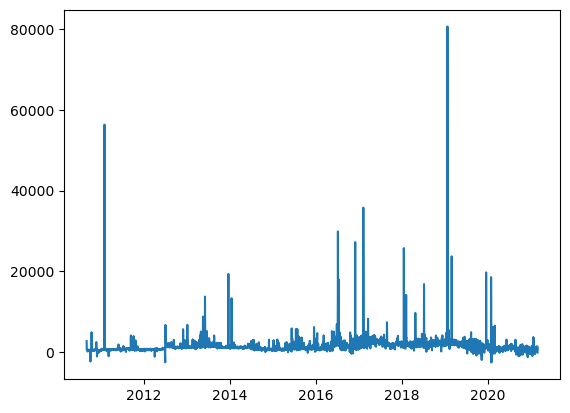

In [7]:
plt.plot(df2copy['FullDate'],df2copy['ElecPrice'])
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

#perform augmented Dickey-Fuller test
adfuller(df2copy['GasPrice'])

(-2.9027666971651778,
 0.045027212884625675,
 27,
 3806,
 {'1%': -3.4320693157877544,
  '5%': -2.8622996992165364,
  '10%': -2.5671743978048323},
 32857.5394299048)

In [9]:
adfuller(df2copy['SysLoad'])

(-3.6901589888366475,
 0.004253725504574097,
 30,
 3803,
 {'1%': -3.432070672988693,
  '5%': -2.8623002987378547,
  '10%': -2.567174716967499},
 79103.01504886392)

In [10]:
trainrange=pd.date_range(start="2010-09-01",freq='D',periods=2757)

In [11]:
trainrange

DatetimeIndex(['2010-09-01', '2010-09-02', '2010-09-03', '2010-09-04',
               '2010-09-05', '2010-09-06', '2010-09-07', '2010-09-08',
               '2010-09-09', '2010-09-10',
               ...
               '2018-03-10', '2018-03-11', '2018-03-12', '2018-03-13',
               '2018-03-14', '2018-03-15', '2018-03-16', '2018-03-17',
               '2018-03-18', '2018-03-19'],
              dtype='datetime64[ns]', length=2757, freq='D')

In [12]:
x=len(df2)-len(trainrange)
print(x)

1077


In [13]:
testrange=pd.date_range(end="2021-02-28",freq='D',periods=x)

In [14]:
testrange

DatetimeIndex(['2018-03-20', '2018-03-21', '2018-03-22', '2018-03-23',
               '2018-03-24', '2018-03-25', '2018-03-26', '2018-03-27',
               '2018-03-28', '2018-03-29',
               ...
               '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22',
               '2021-02-23', '2021-02-24', '2021-02-25', '2021-02-26',
               '2021-02-27', '2021-02-28'],
              dtype='datetime64[ns]', length=1077, freq='D')

In [15]:
dftrain=df2.loc[trainrange]

In [16]:
dftrain.tail()

,Tmax,SysLoad,GasPrice,ElecPrice
2018-03-15,609.6,27139.02585,220.6272,2717.340
2018-03-16,648.0,19710.46400,216.9600,2277.335
2018-03-17,724.8,1079.34705,209.0400,1718.385
2018-03-18,508.8,-4102.43795,203.9880,1088.015
2018-03-19,561.6,8731.39945,199.2720,1998.305


In [17]:
dftest=df2.loc[testrange]

In [18]:
dftest.head()

,Tmax,SysLoad,GasPrice,ElecPrice
2018-03-20,540.0,7696.91130,201.5880,1833.00
2018-03-21,571.2,4658.05865,203.2560,1730.49
2018-03-22,722.4,19161.78525,203.2560,2260.55
2018-03-23,811.2,18090.43435,198.6456,2138.76
2018-03-24,832.8,3763.53865,180.2160,1721.70


In [19]:
dfp=dftrain[['ElecPrice']]
dfp.reset_index(inplace=True)
#dfp['index'] = pd.DatetimeIndex(dfp['index'])
dfp = dfp.rename(columns = {'index':'ds','ElecPrice': 'y'})
dfp.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [20]:
from prophet import Prophet
m = Prophet()
m.fit(dfp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [21]:
future_dates = m.make_future_dataframe(periods=x, freq='D')
future_dates.tail()

,ds
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27
3833,2021-02-28


In [22]:
forecast = m.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2010-09-01,994.279309,-1447.387695,3366.563421
1,2010-09-02,1074.514366,-1313.492208,3424.732931
2,2010-09-03,849.411920,-1420.710930,3164.849079
3,2010-09-04,509.021391,-1706.752655,2772.459201
4,2010-09-05,418.981135,-1779.279859,2962.994199


In [23]:
from sklearn.metrics import mean_absolute_error
y_true = dftest['ElecPrice']
y_pred = forecast['yhat'].iloc[2757:]
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1732.973


In [24]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_true, y_pred)
rmse = math.sqrt(mse)
print('RMSE: %.2f' %rmse)
#2 decimal

RMSE: 3208.69


In [25]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_true, y_pred)
mape=mape*100
print('MAPE: %.4f' % mape)

MAPE: 544.9453


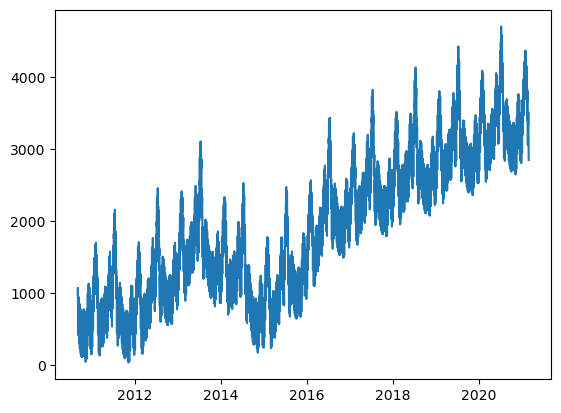

In [26]:
plt.plot(forecast['ds'],forecast['yhat'])

In [27]:
dftrain.reset_index(inplace=True)
dfp["add1"]=dftrain[['SysLoad']]
dfp["add2"]=dftrain[['Tmax']]
dfp["add3"]=dftrain[['GasPrice']]

In [28]:
dfp.head()

,ds,y,add1,add2,add3
0,2010-09-01,2751.700,41565.380,379.2,88.56
1,2010-09-02,570.810,38898.990,369.6,88.56
2,2010-09-03,504.975,41665.760,439.2,106.80
3,2010-09-04,502.275,35638.085,328.8,81.36
4,2010-09-05,500.555,35611.410,357.6,106.80


In [29]:
m2 = Prophet()
m2.add_regressor("add1")
m2.add_regressor("add2")
m2.add_regressor("add3")
m2.fit(dfp)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [30]:
future_dates2 = m2.make_future_dataframe(periods=x, freq='D')
future_dates2.tail()

,ds
3829,2021-02-24
3830,2021-02-25
3831,2021-02-26
3832,2021-02-27
3833,2021-02-28


In [35]:
forecast2 = m2.predict(future_dates2)
#forecast2[['ds','add1','add2','add3', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ValueError: Regressor 'add1' missing from dataframe

In [34]:
y_true2 = dftest['ElecPrice']
y_pred2 = forecast2['yhat'].iloc[2757:]
mae2 = mean_absolute_error(y_true2, y_pred2)
print('MAE: %.3f' % mae2)

NameError: name 'forecast2' is not defined

In [ ]:
mape2=mean_absolute_percentage_error(y_true2, y_pred2)
mape2=mape2*100
print('MAPE2: %.4f' % mape2)

In [ ]:
mse = mean_squared_error(y_true2, y_pred2)
rmse = math.sqrt(mse)
print('RMSE: %.2f' %rmse)